In [1]:
#importing required libraries
from keras.datasets import cifar100
from tensorflow import keras
import keras, os
import numpy as np
import tensorflow as tf
from keras.datasets import cifar100
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, AvgPool2D
from keras.layers import Conv2D, MaxPool2D, BatchNormalization, Input, Softmax
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras import optimizers
from keras.metrics import Precision, Recall
from keras.models import Model
from keras.optimizers import SGD
import matplotlib.pyplot as plt
from keras import backend as K
from keras import regularizers

In [2]:
train=True
num_classes = 100

In [3]:
# The data, shuffled and split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar100.load_data()
x_train = x_train/255.0
x_test = x_test/255.0

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

169009152/169001437 [==============================] - 4s 0us/step


In [4]:
#Model summary using the VGG16 archtecture
x_shape = keras.layers.Input(shape = (32,32,3))
model = Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu")(x_shape)
model = Dropout(0.2)(model)
# model = BatchNormalization()(model)
model = Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu")(model)
model = BatchNormalization()(model)
model = MaxPool2D(pool_size=(2,2),strides=(2,2))(model)

model = Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu")(model)
model = Dropout(0.2)(model)
# model = BatchNormalization()(model)
model = Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu")(model)
model = BatchNormalization()(model)
model = MaxPool2D(pool_size=(2,2),strides=(2,2))(model)

model = Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu")(model)
model = Dropout(0.2)(model)
# model = BatchNormalization()(model)
model = Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu")(model)
model = Dropout(0.2)(model)
# model = BatchNormalization()(model)
model = Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu")(model)
model = BatchNormalization()(model)
model = MaxPool2D(pool_size=(2,2),strides=(2,2))(model)

# model = Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu")(model)
# model = Dropout(0.2)(model)
# model = BatchNormalization()(model)
# model = Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu")(model)
# model = Dropout(0.2)(model)
# model = BatchNormalization()(model)
# model = Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu")(model)
# model = BatchNormalization()(model)
# model = MaxPool2D(pool_size=(2,2),strides=(2,2))(model)

# model = Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu")(model)
# model = Dropout(0.2)(model)
# model = BatchNormalization()(model)
# model = Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu")(model)
# model = Dropout(0.2)(model)
# model = BatchNormalization()(model)
# model = Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu")(model)
# model = BatchNormalization()(model)
# model = MaxPool2D(pool_size=(2,2),strides=(2,2))(model)

model = Flatten()(model)
model = Dense(units=2048, activation="relu")(model)
model = Dropout(0.3)(model)
model = Dense(units=1024,activation="relu")(model)
model = Dropout(0.3)(model)
model = Dense(units=100,activation="softmax")(model)

model1 = Model(x_shape,model)
model1.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 64)        1792      
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 128)      

In [5]:
#optimization details
opt = SGD(lr=0.001, momentum=0.9, nesterov=True)
model1.compile(optimizer= opt, loss='categorical_crossentropy', metrics=['accuracy', 'Precision','Recall'])

In [6]:
batch_size = 128

checkpoint = ModelCheckpoint("vggSGDdropouts.h5", monitor='val_accuracy', verbose=2, save_best_only=True, save_weights_only=True, mode='auto', period=1)
early = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=40, verbose=2, mode='auto')


datagen = ImageDataGenerator(width_shift_range = 0.1,
                             height_shift_range = 0.1,
                             rotation_range = 10,
                             horizontal_flip = True,
                             vertical_flip = False,
                             fill_mode = 'nearest')


hist = model1.fit_generator(datagen.flow(x_train, y_train,
                                 batch_size=batch_size),
                    steps_per_epoch=x_train.shape[0] // batch_size,
                    epochs=100,
                    validation_data=(x_test, y_test),callbacks=[checkpoint, early],verbose=2)

model1.save_weights('vggSGDdropouts.h5') 

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/100

Epoch 00001: val_accuracy improved from -inf to 0.01010, saving model to vggSGDdropouts.h5
390/390 - 28s - loss: 4.4487 - accuracy: 0.0411 - precision: 0.1577 - recall: 7.0180e-04 - val_loss: 5.5491 - val_accuracy: 0.0101 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/100

Epoch 00002: val_accuracy improved from 0.01010 to 0.02910, saving model to vggSGDdropouts.h5
390/390 - 27s - loss: 4.0389 - accuracy: 0.0794 - precision: 0.3405 - recall: 0.0035 - val_loss: 5.1205 - val_accuracy: 0.0291 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/100

Epoch 00003: val_accuracy improved from 0.02910 to 0.04310, saving model to vggSGDdropouts.h5
390/390 - 27s - loss: 3.8681 - accuracy: 0.1049 - precision: 0.4051 - recall: 0.0071 - val_loss: 4.6232 - val_accuracy: 0.0431 - val_precision: 0.3158 - val_recall: 0.0012
Epoch 4/100

Epoch 00004: val_accuracy improved from 0.04310 to 0.0653

In [ ]:
model1.load_weights(filepath = 'vggSGDdropouts.h5')
scores = model1.evaluate(x_train, y_train, verbose=0)

Text(0.5, 1.0, 'recall')

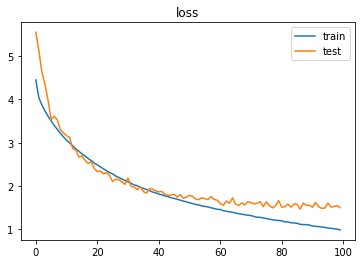

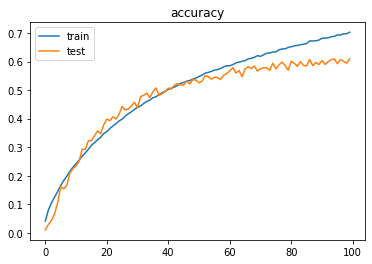

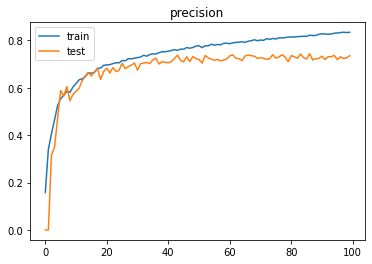

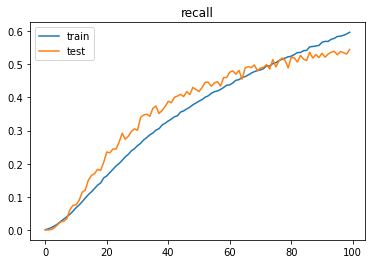

In [9]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.legend(['train','test'])
plt.title('loss')
plt.figure()
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.legend(['train','test'])
plt.title('accuracy')
plt.figure()
plt.plot(hist.history['precision'])
plt.plot(hist.history['val_precision'])
plt.legend(['train','test'])
plt.title('precision')
plt.figure()
plt.plot(hist.history['recall'])
plt.plot(hist.history['val_recall'])
plt.legend(['train','test'])
plt.title('recall')

In [11]:
# Printing the saved weights in numpy arrays
for layer in model1.layers: 
  print(layer.get_weights())

[]
[array([[[[-1.36073187e-01,  1.16815358e-01, -3.06000322e-01, ...,
           2.99658123e-02, -1.18933193e-01, -9.22455415e-02],
         [-6.89320713e-02, -2.37986837e-02,  8.71277452e-02, ...,
          -1.11715887e-02, -6.84357584e-02,  1.42545611e-01],
         [-9.19784009e-02, -9.51742008e-02,  2.37514824e-01, ...,
          -6.30594343e-02,  3.36788245e-03,  8.32476467e-03]],

        [[ 2.12407000e-02, -1.13452479e-01, -9.69896764e-02, ...,
           8.02652016e-02, -1.02124386e-01, -1.83144942e-01],
         [-9.80157033e-02, -6.58600628e-02,  5.25622033e-02, ...,
           8.72119050e-03,  1.02423839e-01, -3.18859406e-02],
         [-3.51645723e-02, -3.42875481e-01, -6.43422315e-03, ...,
           2.28350647e-02, -1.29213035e-02, -8.05989876e-02]],

        [[ 3.49578932e-02,  2.82585859e-01,  1.03116654e-01, ...,
          -6.16717674e-02,  5.67655042e-02,  2.78592054e-02],
         [-9.82740000e-02,  1.81308482e-02, -1.51661798e-01, ...,
          -3.31755984e-03,  9.